In [1]:
!pip install scikit-learn
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install seaborn
!pip install matplotlib_venn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Primo passo: carichiamo ovviamente i dati:

In [3]:
train = pd.read_csv('train.csv')
train.head() #una stampa solo per conferma

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0,60.0,1,257,1,30,0,150000.0,1.0,137,1,1,245
1,1,95.0,1,112,0,40,1,196000.0,1.0,138,0,0,24
2,0,61.0,0,248,0,30,1,267000.0,0.7,136,1,1,104
3,0,42.0,0,64,0,30,0,215000.0,3.8,128,1,1,250
4,0,40.0,0,90,0,35,0,255000.0,1.1,136,1,1,212


#### Effettuo una copia sulla quale effettuare, per sicurezza.

In [4]:
tset = train.copy()
tset.head() #come sopra

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0,60.0,1,257,1,30,0,150000.0,1.0,137,1,1,245
1,1,95.0,1,112,0,40,1,196000.0,1.0,138,0,0,24
2,0,61.0,0,248,0,30,1,267000.0,0.7,136,1,1,104
3,0,42.0,0,64,0,30,0,215000.0,3.8,128,1,1,250
4,0,40.0,0,90,0,35,0,255000.0,1.1,136,1,1,212


#### Diamo un'ochiata ai dati, controllando i tipi e l'eventuale presenza di valori nulli

In [5]:
#Controllo dei tipi
print (tset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DEATH_EVENT               184 non-null    int64  
 1   age                       184 non-null    float64
 2   anaemia                   184 non-null    int64  
 3   creatinine_phosphokinase  184 non-null    int64  
 4   diabetes                  184 non-null    int64  
 5   ejection_fraction         184 non-null    int64  
 6   high_blood_pressure       184 non-null    int64  
 7   platelets                 184 non-null    float64
 8   serum_creatinine          184 non-null    float64
 9   serum_sodium              184 non-null    int64  
 10  sex                       184 non-null    int64  
 11  smoking                   184 non-null    int64  
 12  time                      184 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 18.8 KB
None


In [6]:
#Controllo dei Nan
tset.isnull().sum()

DEATH_EVENT                 0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

### La sitauzione è ottimale: I tipi sono tutti numerici, dunque non si necessita di un encoder Non vi sono valori nulli.
#### Una precisazione che si potrebbe fare è quella di portare i valori di età da float a int per avere una scala comune. L'unica variazione si avrà in due record che presentano un'età di 60,667 anni. Si tratta di una modifica superflua e dunque è stata trascurata.

## Commenti a monte: 
#### Essendo una ricerca in campo medico, l'ideale sarebbe stato quello di andare ad analizzare ogni feature in funzione delle altre, anche in varie combinazioni. Per rendere l'elaborato anche solo vagamente sintetico reputo opportuno limitare l'analisi al solo studio individuale delle feature ed il loro rapporto con il DEATH_EVENT.
### Andiamo ad effettuare una rapida verifica del contenuto dei dati:
#### Si mostra ora una distribuzione dei valori quantitativi e se ne discutono di seguito i risultati,caso per caso...

<AxesSubplot:xlabel='serum_sodium', ylabel='Count'>

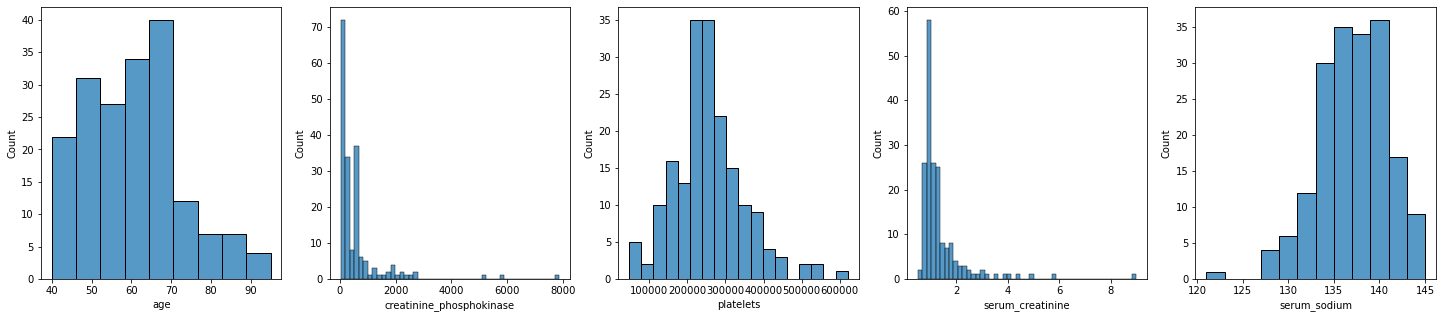

In [7]:
fig, axarr = plt.subplots(1, 5, figsize=(25, 5))

sns.histplot(data=tset, x="age", ax=axarr[0])
sns.histplot(data=tset, x="creatinine_phosphokinase", ax=axarr[1])
sns.histplot(data=tset, x="platelets", ax=axarr[2])
sns.histplot(data=tset, x="serum_creatinine", ax=axarr[3])
sns.histplot(data=tset, x="serum_sodium", ax=axarr[4])

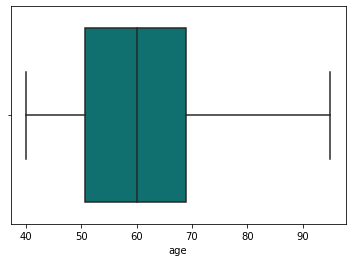

In [8]:
sns.boxplot(x=tset.age, color = 'teal')
plt.show()


#### L'età non presenta valori insoliti e si può notare come i pazienti siano adulti nella totalità dei casi. Ê Intuitivo che uno studio del genere non abbia i giovani come target ma è comunque utile averne la conferma.

<AxesSubplot:xlabel='serum_sodium'>

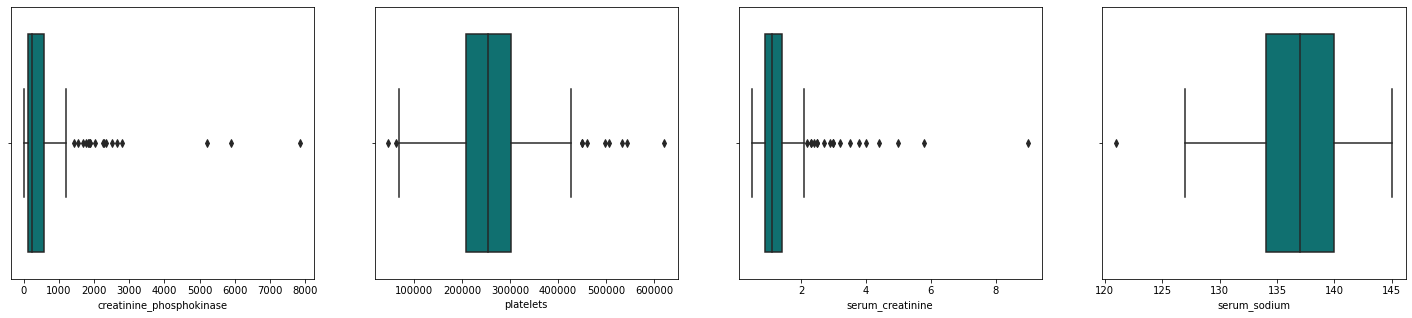

In [9]:
fig, axarr = plt.subplots(1, 4, figsize=(25, 5))

sns.boxplot(x=tset.creatinine_phosphokinase, color = 'teal', ax=axarr[0])
sns.boxplot(x=tset.platelets, color = 'teal', ax=axarr[1])
sns.boxplot(x=tset.serum_creatinine, color = 'teal', ax=axarr[2])
sns.boxplot(x=tset.serum_sodium, color = 'teal', ax=axarr[3])


#### Anche i valori delle analisi del sangue sono legittimi e non presentano stranezze. Nonostante siano frequenti valori fuori norma, sono comunque valori che è possibile raggiugnere in determinate condizioni.
I valori sono inerenti alle scale proposte. Si escludono possibili ambiguità come la mancanza della virgola su valori con molti decimali (dove un 1,125 viene rappresentato come 1125), 
in particolare, i valori sono nella maggior parte dei casi prossimi ai livelli normali:
- I valori normali di creatinchinasi rientrano nell'intervallo 60 - 190 U/L (Si nota infatti come il conteggio nella distribuzione sia maggiore per valori relativamente bassi nonostante ci siano casi in cui si supera addirittura i 5000)
- Piastrine: Il valore normale in un prelievo di sangue varia da 150.000 a 450.000 per mm cubo (microlitro).
- Il valore normale per la creatinina nel sangue può essere compreso tra 0,84 a 1,21 milligrammi per decilitro (mg/dl)
- In condizioni fisiologiche, la concentrazione di sodio nel sangue (natriemia o sodiemia) viene mantenuta a livelli compresi tra 135 e 145 mmol/L

Ovviamente non ci sorprende la frequente presenza di outlier in un ambito come questo, trattandosi di risultati relativi a pazienti in osservazione.

### Si suppone nella continuazione dell'elaborato che il caso di DEATH_EVENT sia dovuto unicamente ad un attacco di cuore, e dunque i dati biassati provocati dal decesso dovuto ad altre cause di individui compresi nello studio sia stato escluso in fase di raccolta dei dati.

### Procediamo ora ad analizzare i dati in funzione del parametro DEATH_EVENT

### Vediamo innanzitutto la distribuzione del DEATH_EVENT

Text(0.5, 1.0, 'the % of deaths')

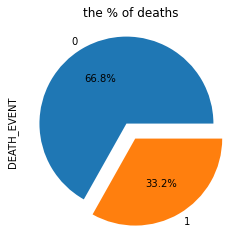

In [10]:
tset.DEATH_EVENT.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%')
plt.title('the % of deaths')

#### Vista la distribuzione dell'età, vediamone il rapporto con il DEATH_EVENT.

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

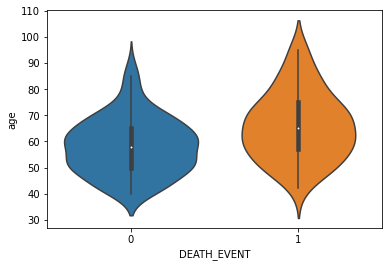

In [11]:
sns.violinplot(data=tset, x="DEATH_EVENT", y="age")

##### Si deduce duqnue che il rischio maggiore lo hanno individui di mezza età, anche piu di chi appartiene alla fascia anziana.
### Ma l'età non è indicativa dello stile di vita, andiamo a vedere il rapporto tra il DEATH_EVENT e le varie caratteristiche booleane.

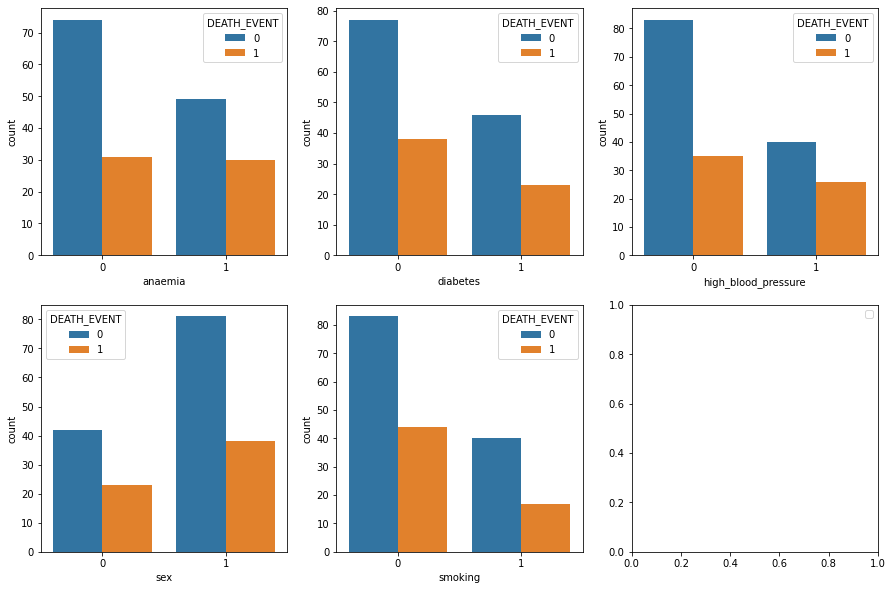

In [12]:
fig, axarr = plt.subplots(2, 3, figsize=(15, 10))

sns.countplot(x='anaemia',hue='DEATH_EVENT',data=tset, ax=axarr[0][0])
sns.countplot(x='diabetes',hue='DEATH_EVENT',data=tset, ax=axarr[0][1])
sns.countplot(x='high_blood_pressure',hue='DEATH_EVENT',data=tset, ax=axarr[0][2])
sns.countplot(x='sex',hue='DEATH_EVENT',data=tset, ax=axarr[1][0])
sns.countplot(x='smoking',hue='DEATH_EVENT',data=tset, ax=axarr[1][1])

plt.legend(['yes','no']);

#### Da qui si nota l'importanza delle singole caratteristiche. la probabilità di soffrire di incontrare un DEATH_EVENT infatti molto più alta quando le caratteristiche sono a 1 nelle feature che indicano maggiore esposizione al rischio. Eccezione si ha nel quarto grafico, dove si nota un forte sbilanciamento fra i sessi.

<AxesSubplot:xlabel='time', ylabel='count'>

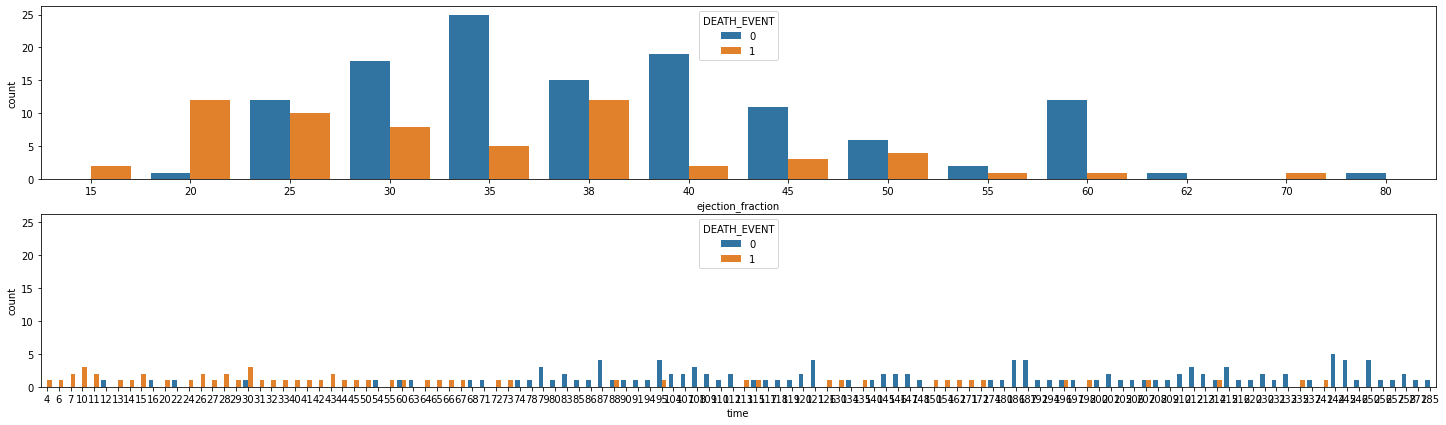

In [13]:
fig, axarr = plt.subplots(2, 1, figsize=(25, 7), sharey=True)
sns.countplot(x='ejection_fraction',hue='DEATH_EVENT',data=tset, ax=axarr[0])
sns.countplot(x='time',hue='DEATH_EVENT',data=tset, ax=axarr[1])
# fig.suptitle('Tasso di mortalità date le seguenti caratteristiche')

### Per quel che riguarda i valori di "ejection_fraction" e "time" si hanno i seguenti risultati.

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

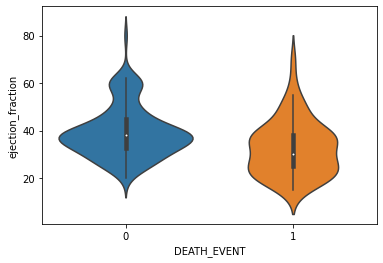

In [14]:
sns.violinplot( data=tset, y="ejection_fraction", x="DEATH_EVENT")


- Cio che legaa la percentuale di sangue che esce dal cuore ad ogni contrazione con il rischio di avere un DEATH_EVENT sono le situazioni di estremo. In particolare si può supporre che un attacco cardiaco, essendo provocato dall'affaticamento del muscolo, sia probabile quando la percentuale di sangue pomapata sia molto alta(dunque il ritmo del battito è basso) o viceversa quando la percentuale è bassa(caso che corrisponde ad un battito molto veloce). Il ragionamento è in linea con lo studio appena effettuato del grafico di alta pressione.

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='time'>

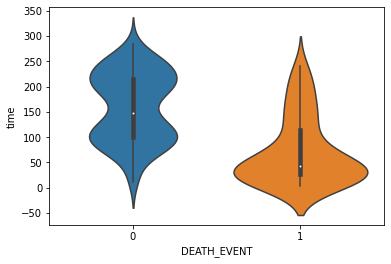

In [15]:
sns.violinplot( data=tset, y="time", x="DEATH_EVENT")

- Lo studio del periodo di osservazione mostra una probabilità maggiore di realizzarsi un DEATH_EVENT nei primi tempi di studio. Questo potrebbe voler dire se che il fisico e/o il personale medico riesce a gestire al meglio la sitauzione in una situazione di rischio, col tempo il cuore sarà probabilmente in grado di riprendersi, abbassando la probabilità.

### Passiamo ora ad uno studio delle correlazioni interessanti nel dataset con uno studio dei risultati di una una matrice di correlazione

<AxesSubplot:>

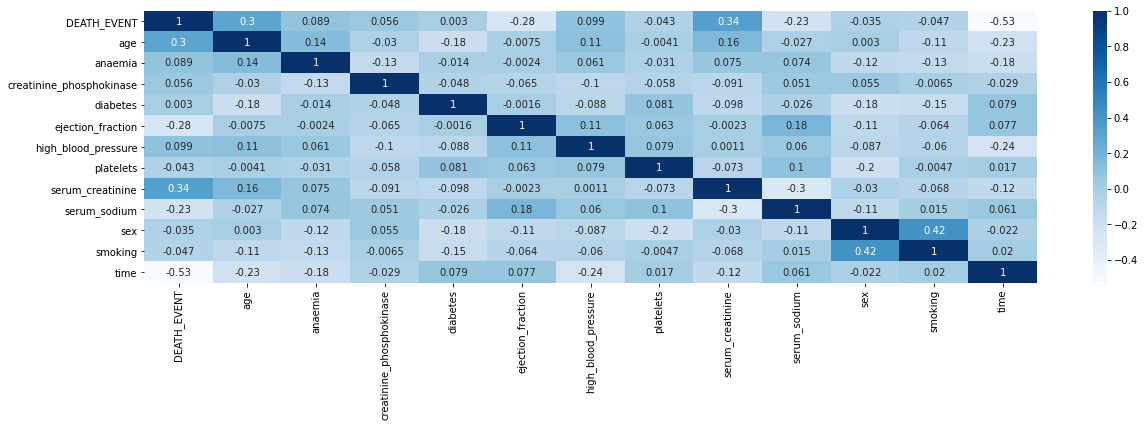

In [16]:
corr = tset.corr()
plt.figure(figsize = (20,5))
sns.heatmap(corr, cmap="Blues", annot=True)

#### Non può non saltare all'occhio una correlazione negativa molto forte tra la DEATH_EVENT e il tempo speso in osservazione.
#### Un'altro esempio di correlazione al DEATH_EVENT si ha con il campo age e con il campo serum_creatinine, entrambe piuttosto marcate.
#### Ê interessante osservare inoltre una correlazione tra sex e smoking, probabilmente frutto dall' eterogeneità dei paziendi del dataset.

## A questo punto possiamo pensare di iniziare a costruire un modello per il trainig
#### Vista l'importanza delle varie vodi del dataset, da un punto di vista statistico ma anche da un punto di vista medico dimostrato in letteratura, non si ritiene necessario eseguire il drop di alcuna feature.
#### Per eseguire il training si opta per un modello di decision tree. Di seguito, dopo aver valutato il risultato, si eseguo una verifica dell'importanza delle varie features.

In [17]:
#procedo con la lettura del test set

test = pd.read_csv('test.csv')
test.head() #una stampa solo per conferma
train = pd.read_csv('train.csv')
train.head() #una stampa solo per conferma

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0,60.0,1,257,1,30,0,150000.0,1.0,137,1,1,245
1,1,95.0,1,112,0,40,1,196000.0,1.0,138,0,0,24
2,0,61.0,0,248,0,30,1,267000.0,0.7,136,1,1,104
3,0,42.0,0,64,0,30,0,215000.0,3.8,128,1,1,250
4,0,40.0,0,90,0,35,0,255000.0,1.1,136,1,1,212


In [18]:
y_train = train["DEATH_EVENT"].values
x_train = train.drop(["DEATH_EVENT"], axis=1).values

y_test = test["DEATH_EVENT"].values
x_test = test.drop(["DEATH_EVENT"], axis=1).values

In [19]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(x_train, y_train)
print("Accuracy on training set: {:.5f}".format(dt.score(x_train, y_train)))
print("Accuracy on test set: {:.5f}".format(dt.score(x_test, y_test)))

Accuracy on training set: 1.00000
Accuracy on test set: 0.87273


#### Sono stati effettuati degli studi sull'importanza delle feature relativamente al training:

In [20]:
print("Feature importances:")
print(dt.feature_importances_)

Feature importances:
[0.04970558 0.         0.17541163 0.02411609 0.07907634 0.
 0.03967213 0.16834671 0.05468178 0.         0.         0.40898973]


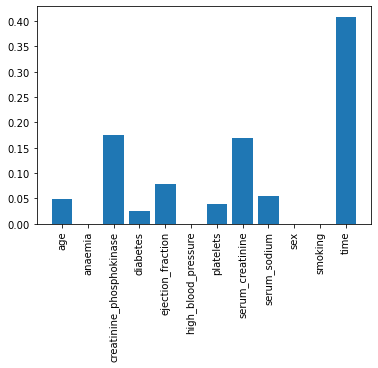

In [21]:
plt.bar(test.columns.drop(["DEATH_EVENT"]), dt.feature_importances_)
plt.xticks(test.columns.drop(["DEATH_EVENT"]), test.columns.drop(["DEATH_EVENT"]), rotation='vertical')
plt.show()

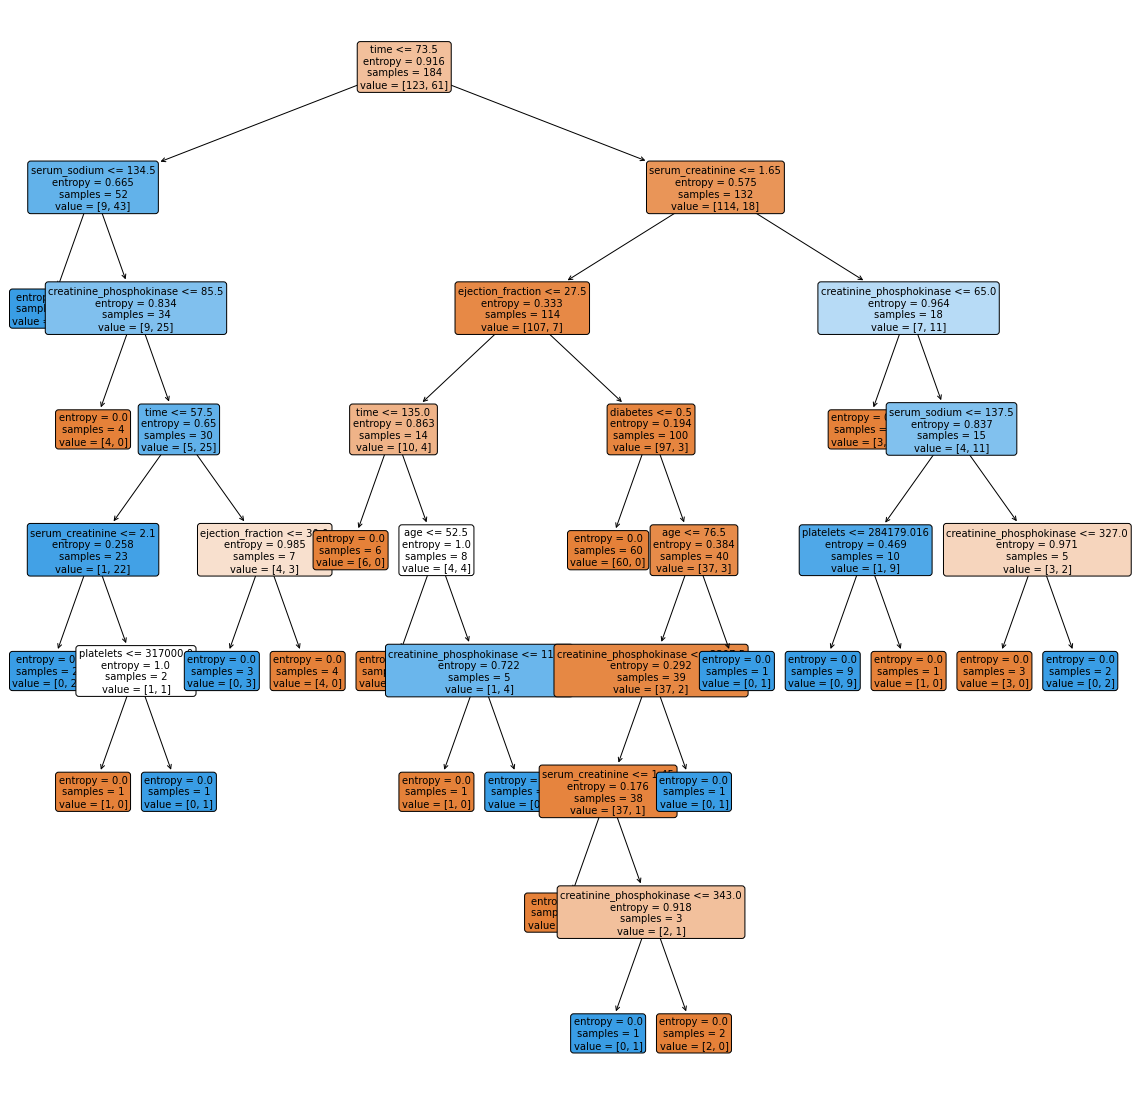

In [22]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(dt, fontsize=10, rounded=True, filled=True, feature_names=test.columns.drop(["DEATH_EVENT"]))  
plt.show()

## Conclusioni

La realizzazione del progetto è stata strutturata nel modo seguente:
   - I valori forniti sono stati analizzati dal punto di vista dei dati, verificando il tipo e l'eventuale presenza di valori nulli.
   - Lo studio si è soffermato particolarmente sui parametri medici, appurando che durante la raccolta non siano stati fatti errori di forma.
   - In seguito si è effettuata un'analisi dei singoli valori, prima quelli numerici con la relativa distribuzione e poi quelli booleani in relazione alla DEPTH_EVENT.
   - Ê stata effettuata una ulteriore analisi realitavemte alle correlazioni dei dati tra colonne, effettuando un commento dei risultati ma senza entrare nello specifico.
   - A fronte dell'analisi, si è reputata opportuna la scelta di un decision tree come modello di training. Una volta ottenuti i risultati è stata effettuata un'ulteriore indagine circa il peso associato dal sistema alle varie feature per la fase di train.